### Data Analtyics for Investment Decision Making

##### Company: Data Glacier

##### LISP01

Goal: You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 


- By: Ajaegbu Ebuka Emmanuel


#### Load the Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy as sp
from scipy import stats
import seaborn as sns
plt.style.use("Solarize_Light2")

##### Load the Data

In [2]:
CabData = pd.read_csv("Cab_Data.csv")
CustomerID = pd.read_csv("Customer_ID")
TransactionID = pd.read_csv("Transaction_ID")
City =pd.read_csv("City.csv")

# Data Preprocessing 
We try to understand all the varaiables in each datasets

### 1) Understanding the Datasets

#### a) Customer ID 

In [3]:
CustomerID.head(3)

,Unnamed: 0,Customer ID,Gender,Age,Income (USD/Month)
0,0,29290,Male,28,10813
1,1,27703,Male,27,9237
2,2,28712,Male,53,11242


In [4]:
CustomerID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          49171 non-null  int64 
 1   Customer ID         49171 non-null  int64 
 2   Gender              49171 non-null  object
 3   Age                 49171 non-null  int64 
 4   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.9+ MB


In [5]:
#### Checking for Missing Values
CustomerID.isnull().sum()

Unnamed: 0            0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

There is no missing values in the Customer ID Data file

#### b)  CabData Dataset

In [6]:
CabData.head(3)

,Unnamed: 0,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [7]:
CabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      359392 non-null  int64  
 1   Transaction ID  359392 non-null  int64  
 2   Date of Travel  359392 non-null  object 
 3   Company         359392 non-null  object 
 4   City            359392 non-null  object 
 5   KM Travelled    359392 non-null  float64
 6   Price Charged   359392 non-null  float64
 7   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 21.9+ MB


###### Creating another varable Called Profit
Prifit is the Differnce between Price Charged and Cost of trip

In [8]:
# Profit
CabData["Profit"] =CabData["Price Charged"]- CabData["Cost of Trip"]

In [9]:
# Convert to a Date Object
CabData["Date of Travel" ]=pd.to_datetime(CabData["Date of Travel"])
CabData.head(3)

,Unnamed: 0,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568


There is no missing values in the Dataset. The Date of Travel variables was correctly formatted and a new varible "Profit" was created. The Profit per one Trip

##### c) TransactionID Dataset

In [10]:
TransactionID.head(3)

,Unnamed: 0,Transaction ID,Customer ID,Payment_Mode
0,0,10000011,29290,Card
1,1,10000012,27703,Card
2,2,10000013,28712,Cash


In [11]:
TransactionID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      440098 non-null  int64 
 1   Transaction ID  440098 non-null  int64 
 2   Customer ID     440098 non-null  int64 
 3   Payment_Mode    440098 non-null  object
dtypes: int64(3), object(1)
memory usage: 13.4+ MB


There is no missing value in the Data.

#### d) City Dataset

In [12]:
City.head(5)

,Unnamed: 0,City,Population,Users
0,0,NEW YORK NY,8405837,302149
1,1,CHICAGO IL,1955130,164468
2,2,LOS ANGELES CA,1595037,144132
3,3,MIAMI FL,1339155,17675
4,4,SILICON VALLEY,1177609,27247


In [13]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20 non-null     int64 
 1   City        20 non-null     object
 2   Population  20 non-null     int64 
 3   Users       20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 768.0+ bytes


No missing value was found in the data

### 2) Merging The Four Dataset Together.

CustomerID, CIty, CabData and TransactionID Dataset.

In [14]:
# Merging the CabData and TransactionID Together
data =pd.merge(left= CabData,right= TransactionID,how="outer",on=["Transaction ID"])
data.head(3)

,Unnamed: 0_x,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Unnamed: 0_y,Customer ID,Payment_Mode
0,0.0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,0,29290,Card
1,1.0,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,1,27703,Card
2,2.0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,2,28712,Cash


In [15]:
# Merge with the CustomerID data
New_data =pd.merge(left= data,right= CustomerID,how="outer",on=["Customer ID"])
New_data.head(3)

,Unnamed: 0_x,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Unnamed: 0_y,Customer ID,Payment_Mode,Unnamed: 0,Gender,Age,Income (USD/Month)
0,0.0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,0,29290,Card,0,Male,28,10813
1,285625.0,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,351116,29290,Cash,0,Male,28,10813
2,336890.0,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,412910,29290,Card,0,Male,28,10813


In [16]:
###  Merge with the City Dataset
New_data= pd.merge(left=New_data,right=City,on="City",how="outer")
New_data.head(3)

,Unnamed: 0_x,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Unnamed: 0_y,Customer ID,Payment_Mode,Unnamed: 0_x,Gender,Age,Income (USD/Month),Unnamed: 0_y,Population,Users
0,0.0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,0.0,29290.0,Card,0.0,Male,28.0,10813.0,9.0,814885.0,24701.0
1,285625.0,10351127.0,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,351116.0,29290.0,Cash,0.0,Male,28.0,10813.0,9.0,814885.0,24701.0
2,336890.0,10412921.0,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,412910.0,29290.0,Card,0.0,Male,28.0,10813.0,9.0,814885.0,24701.0


In [17]:
### Basic Information
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440099 entries, 0 to 440098
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0_x        359392 non-null  float64       
 1   Transaction ID      440098 non-null  float64       
 2   Date of Travel      359392 non-null  datetime64[ns]
 3   Company             359392 non-null  object        
 4   City                359393 non-null  object        
 5   KM Travelled        359392 non-null  float64       
 6   Price Charged       359392 non-null  float64       
 7   Cost of Trip        359392 non-null  float64       
 8   Profit              359392 non-null  float64       
 9   Unnamed: 0_y        440098 non-null  float64       
 10  Customer ID         440098 non-null  float64       
 11  Payment_Mode        440098 non-null  object        
 12  Unnamed: 0_x        440098 non-null  float64       
 13  Gender              440098 no

There are missing values in the datasets and some irrelevant datasets.

### 3) Dropping Missing Values and irrelevant Columns

In [18]:
# Dropping Missing Values 
New_data.dropna(axis=0,how="any",inplace=True)

In [19]:
# List of Columns 
New_data.columns

Index(['Unnamed: 0_x', 'Transaction ID', 'Date of Travel', 'Company', 'City',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit',
       'Unnamed: 0_y', 'Customer ID', 'Payment_Mode', 'Unnamed: 0_x', 'Gender',
       'Age', 'Income (USD/Month)', 'Unnamed: 0_y', 'Population', 'Users'],
      dtype='object')

In [20]:
New_data.drop(["Unnamed: 0_x","Unnamed: 0_y","Unnamed: 0_x","Unnamed: 0_y"], axis=1, inplace=True)

In [21]:
# List of Columns 
New_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'Population',
       'Users'],
      dtype='object')

In [22]:
# Checking if the missing value has properly be addressed.
New_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Profit                0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

#### Creating New Variables

In [23]:
### Create New Variable
# Price Per kilometer Travelled
New_data["Price/KM"]= New_data["Price Charged"]/New_data["KM Travelled"]

# Cost Per Kiloeter Travelled 
New_data["Cost/KM"]= New_data["Cost of Trip"]/New_data["KM Travelled"]

# Profit per Kilometer Travelled
New_data["Profit/KM"]= New_data["Profit"]/New_data["KM Travelled"]

In [24]:
### Creating a colums of Year Only
New_data["Year"]= pd.DatetimeIndex(New_data["Date of Travel"]).year

### Creating a colums of month Only
New_data["Month"]= pd.DatetimeIndex(New_data["Date of Travel"]).month

### Creating a colums of day Only
New_data["Days"]= pd.DatetimeIndex(New_data["Date of Travel"]).day

In [25]:
# View the dataset
New_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,...,Age,Income (USD/Month),Population,Users,Price/KM,Cost/KM,Profit/KM,Year,Month,Days
0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290.0,Card,...,28.0,10813.0,814885.0,24701.0,12.182266,10.30,1.882266,2016,1,8
1,10351127.0,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290.0,Cash,...,28.0,10813.0,814885.0,24701.0,22.859870,12.12,10.739870,2018,7,21
2,10412921.0,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290.0,Card,...,28.0,10813.0,814885.0,24701.0,18.614571,14.04,4.574571,2018,11,23


In [26]:
New_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'Population',
       'Users', 'Price/KM', 'Cost/KM', 'Profit/KM', 'Year', 'Month', 'Days'],
      dtype='object')

In [27]:
### Finding Duplicates rows/cases in the dataset.
New_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
440093    False
440094    False
440095    False
440096    False
440097    False
Length: 359392, dtype: bool

In [28]:
########## Selecting the Duplicated Row
New_data[New_data.duplicated()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,...,Age,Income (USD/Month),Population,Users,Price/KM,Cost/KM,Profit/KM,Year,Month,Days


There are no duplicates in the dataset

In [29]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 440097
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  float64       
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Profit              359392 non-null  float64       
 8   Customer ID         359392 non-null  float64       
 9   Payment_Mode        359392 non-null  object        
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  float64       
 12  Income (USD/Month)  359392 non-null  float64       
 13  Population          359392 no

## EDA and Hypothesis

### a) Price Charged Analysis
####  1) Hpothesis: There is no  differnce in the Price Charged by two cab company?- Pink Cab and Yellow Cab

In [30]:
# Group the dataset by Company
company_group = New_data.groupby("Company")

In [31]:
company_group.mean().loc[:,["Price Charged","Profit","Income (USD/Month)","KM Travelled"]]

,Price Charged,Profit,Income (USD/Month),KM Travelled
Company,,,,
Pink Cab,310.800856,62.652174,15059.047137,22.559917
Yellow Cab,458.181990,160.259986,15045.669817,22.569517


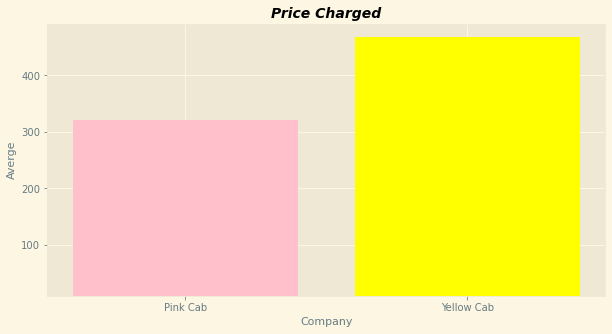

In [32]:
## Bar chart
plt.figure(figsize=(10,5))
plt.bar(company_group.mean().index,company_group.mean()["Price Charged"],color=["pink","yellow"],bottom=10)
plt.xlabel("Company",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.title("Price Charged",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("Price_charged.png",dpi=100)
plt.show()


In [33]:
## The Differnce in the average price charged
company_group.mean()["Price Charged"][1] - company_group.mean()["Price Charged"][0]

147.38113377588945

There is a differce in the average price charged by the two cab company, The Yellow Cab Company Charged on an aveerage 147 more  than the Pink cab


###### Hypothesis testing using the two sample Test

H0: The average price charged by the yellow cab is not different from the pink cab

H1: The average price charged by the yellow cab is greater then the pink cab

In [34]:
## An array of Priced charged by the pink cab
Pink_priced_charged = New_data[New_data["Company"] == "Pink Cab"]["Price Charged"]
Yellow_priced_charged = New_data[New_data["Company"] == "Yellow Cab"]["Price Charged"]


In [35]:
### Two sample T test with assumption of unequal varainace
ttest1 = stats.ttest_ind(Yellow_priced_charged,Pink_priced_charged,equal_var= False)
ttest1

Ttest_indResult(statistic=176.94201665608205, pvalue=0.0)

The Pvalue of   0.0 is less than the level of significance. The null hypothesis is rejected. The average priced cahrged by the yellow cab is greater than the pink cab.

#### 2) Hpothesis: There is no differnce in the Price charged by two cab company across the City

is there any city where the price charged is greater than the other?

In [36]:
## An array of City
city = New_data["City"].unique()
city

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [37]:
# Pivot table- The average Price Charge by Company and City
pvt1 = pd.pivot_table(New_data, values=["Price Charged"],index='Company',columns="City",aggfunc="mean")
pvt1

Price Charged                                                 \
City          ATLANTA GA  AUSTIN TX   BOSTON MA  CHICAGO IL   DALLAS TX   
Company                                                                   
Pink Cab      302.131555  320.43507  300.551489  281.613731  260.025652   
Yellow Cab    422.413446  422.24894  359.140431  364.021927  493.807790   

                                                                            \
City         DENVER CO LOS ANGELES CA    MIAMI FL NASHVILLE TN NEW YORK NY   
Company                                                                      
Pink Cab    276.202453     305.624252  326.006309   282.062493  357.074129   
Yellow Cab  443.235413     416.231136  432.944872   376.245577  604.841911   

                                                                               \
City       ORANGE COUNTY  PHOENIX AZ PITTSBURGH PA SACRAMENTO CA SAN DIEGO CA   
Company                                                                         
Pink Cab      312.026874  280.321458    273.879355    290.110810   307.938193   
Yellow Cab    438.548623  428.737417    405.313661    362.637106   392.223328   

                                                                 
City        SEATTLE WA SILICON VALLEY   TUCSON AZ WASHINGTON DC  
Company                                                          
Pink Cab    291.223898     340.377008  323.213554    299.974561  
Yellow Cab  391.014733     506.499502  366.018224    381.051261

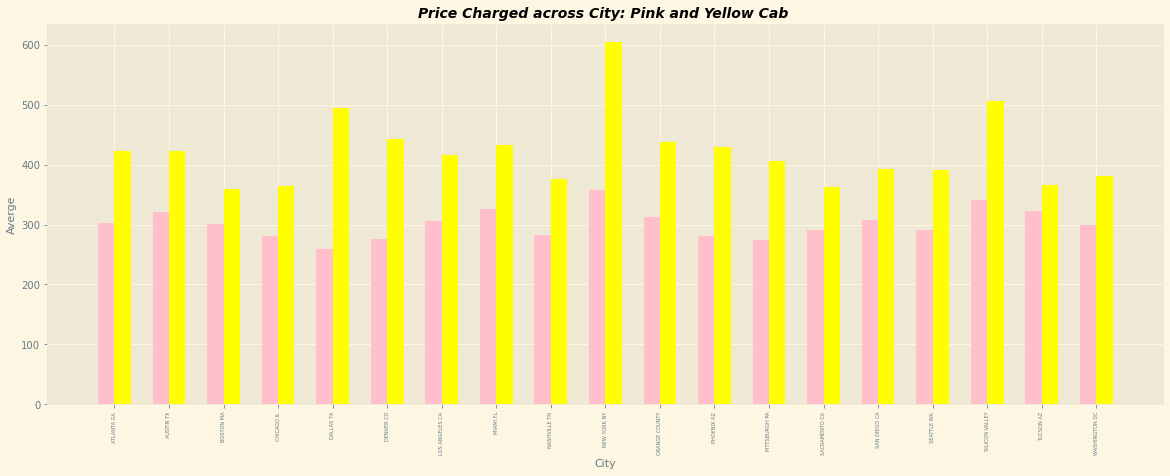

In [38]:
## Distribution
plt.figure(figsize=(20,7))
X= np.arange(19)
plt.bar(X,pvt1.iloc[0,:].values,color="pink",width=0.3,label="Pink Cab")
plt.bar(X+0.3,pvt1.iloc[1,:].values,color="yellow",width=0.3,label="Yellow Cab")
plt.xlabel("City",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.xticks(X+0.15,city,rotation=90,fontsize=5,fontweight=10)
plt.title("Price Charged across City: Pink and Yellow Cab ",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("Price_charged2.png")
plt.show()

Across all City, The Profit Charged by the Yellow cab company is more than the pink cab company.

#### 3) Hpothesis: There is  a no  differnce in the Price charged by two cab company across the Year

In [39]:
# Pivot Table- Avearge Price Charged acroos the year
pvt2 = pd.pivot_table(New_data, values=["Price Charged"],index='Company',columns="Year",aggfunc="mean")
pvt2

Price Charged                        
Year                2016        2017        2018
Company                                         
Pink Cab      315.330113  315.907442  301.642530
Yellow Cab    467.918301  466.639950  440.875558

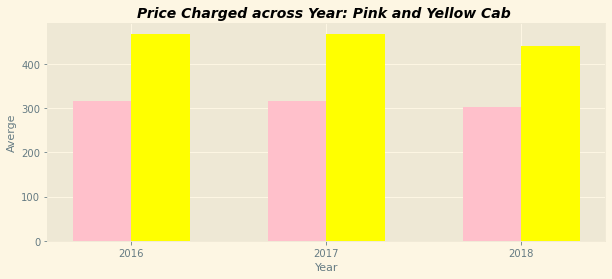

In [40]:
## Distribution
plt.figure(figsize=(10,4))
X= np.arange(3)
plt.bar(X,pvt2.iloc[0,:].values,color="pink",width=0.3,label="Pink Cab")
plt.bar(X+0.3,pvt2.iloc[1,:].values,color="yellow",width=0.3,label="Yellow Cab")
plt.xlabel("Year",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.xticks(X+0.15,["2016","2017","2018"])
plt.title("Price Charged across Year: Pink and Yellow Cab ",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("Price_charged3.png",dpi= 100)
plt.show()

The Average Price Charged for the Yellow Cab is higher across the year when compared to the pinks Cab.

#### 4) Hpothesis: There is  a no  differnce in the Price charged by two cab company across the Month

In [41]:
# Pivot Table- Avearge Price Charged acroos the year
pvt3 = pd.pivot_table(New_data, values=["Price Charged"],index='Company',columns="Month",aggfunc="mean")
pvt3

Price Charged                                                  \
Month                 1           2           3           4           5    
Company                                                                    
Pink Cab      323.965715  322.869816  323.829922  307.882682  280.909008   
Yellow Cab    485.584381  496.415571  479.070161  475.398838  509.412546   

                                                                        \
Month               6           7           8           9           10   
Company                                                                  
Pink Cab    289.860660  293.270042  297.748107  298.572337  313.221773   
Yellow Cab  487.664774  435.306015  419.012419  448.998835  437.624182   

                                    
Month               11          12  
Company                             
Pink Cab    321.388766  337.896084  
Yellow Cab  443.486553  444.034931

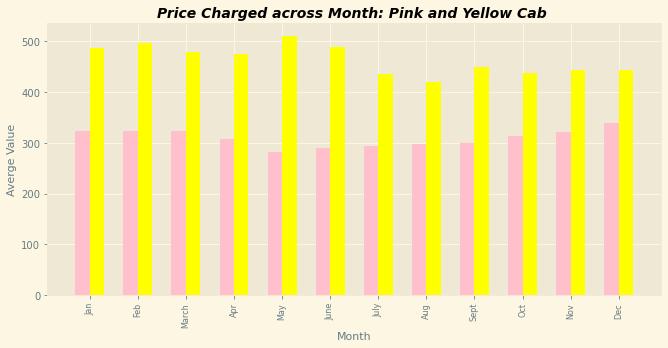

In [42]:
## Distribution
plt.figure(figsize=(11,5))
X= np.arange(12)
plt.bar(X,pvt3.iloc[0,:].values,color="pink",width=0.3,label="Pink Cab")
plt.bar(X+0.3,pvt3.iloc[1,:].values,color="yellow",width=0.3,label="Yellow Cab")
plt.xlabel("Month",fontsize=11)
plt.ylabel("Averge Value",fontsize=11)
plt.xticks(X+0.15,["Jan","Feb","March","Apr","May","June","July","Aug","Sept","Oct","Nov","Dec"],\
          rotation=90,fontsize=8)
plt.title("Price Charged across Month: Pink and Yellow Cab ",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("Price_charged4.png",dpi=100)
plt.show()

The Yellow Cab has  a higher average price charged across the Month when compared to the Pink Cab. This dynamics has not changed across Month

###### Trend in the Price Charged 

In [43]:
pvt4 = pd.pivot_table(New_data, values=["Price Charged"],index='Company',columns=["Year","Month"],aggfunc="mean")
pvt4

Price Charged                                                  \
Year                2016                                                   
Month                 1           2           3           4           5    
Company                                                                    
Pink Cab      329.273754  328.116057  320.788278  308.933476  285.406356   
Yellow Cab    524.912546  513.100028  479.378103  476.837149  510.520786   

                                                                        ...  \
Year                                                                    ...   
Month               6           7           8           9           10  ...   
Company                                                                 ...   
Pink Cab    290.837399  300.526673  305.595744  294.861160  315.994016  ...   
Yellow Cab  518.223370  450.808252  421.765382  460.324585  438.220594  ...   

                                                                       \
Year              2018                                                  
Month               3          4           5           6           7    
Company                                                                 
Pink Cab    316.859563  304.12649  274.868490  277.087723  284.735142   
Yellow Cab  460.284521  461.31330  491.562079  469.114105  416.078900   

                                                                        
Year                                                                    
Month               8           9           10          11          12  
Company                                                                 
Pink Cab    287.082388  292.607824  305.164311  311.165384  321.952363  
Yellow Cab  405.279135  427.231602  428.342775  423.468039  430.493864  

[2 rows x 36 columns]

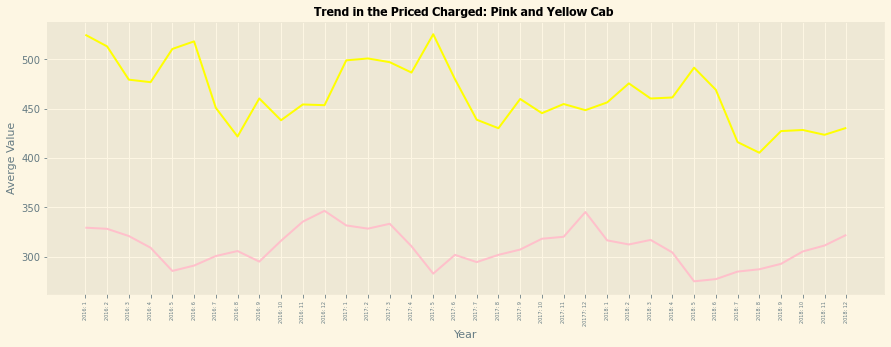

In [44]:
## Distribution
#plt.style.use("classic")
plt.figure(figsize=(15,5))
X= np.arange(36)
pvt4.iloc[0,:].plot(color="pink")
pvt4.iloc[1,:].plot(color="yellow")
plt.xlabel("Year",fontsize=11)
plt.ylabel("Averge Value",fontsize=11)
plt.xticks(X,["2016: 1","2016: 2","2016: 3","2016: 4","2016: 5","2016: 6","2016: 7","2016: 8","2016: 9","2016: 10","2016: 11","2016: 12",\
           "2017: 1","2017: 2","2017: 3","2017: 4","2017: 5","2017: 6","2017: 7","2017: 8","2017: 9","2017: 10","2017: 11","20177: 12",\
             "2018: 1","2018: 2","2018: 3","2018: 4","2018: 5","2018: 6","2018: 7","2018: 8","2018: 9","2018: 10","2018: 11","2018: 12"],rotation=90,fontsize=5,fontweight=10)
plt.title("Trend in the Priced Charged: Pink and Yellow Cab ",fontname="Tahoma",fontsize=12,fontstyle="italic",fontweight="bold")
plt.savefig("Price_charged5.png",dpi=100)
plt.show()

### b) Profit  Analysis

In [45]:
####
company_group.mean()["Profit"]

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

#### 5) Hpothesis: There is a no difference in the Profit by two cab company

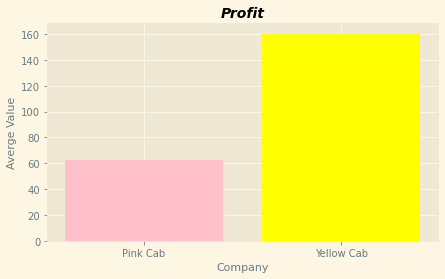

In [46]:
## Distribution
plt.figure(figsize=(7,4))
plt.bar(company_group.mean().index,company_group.mean()["Profit"],color=["pink","yellow"])
plt.xlabel("Company",fontsize=11)
plt.ylabel("Averge Value",fontsize=11)
plt.title("Profit",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("Profit.png",dpi=100)
plt.show()

In [47]:
## The Differnce in the average price charged
company_group.mean()["Profit"][1] - company_group.mean()["Profit"][0]

97.60781173141027

The Yellow cab makes more profit when compared to the pink cab, The yellow Cab has an average of 97.607 profit more than the pink cab.

###### Hypothesis testing using the two sample Test

H0: The average profit by the yellow cab is not different from the pink cab

H1: The average profit by the yellow cab is greater then the pink cab

In [48]:
## An array of Priced charged by the pink cab
Pink_profit= New_data[New_data["Company"] == "Pink Cab"]["Profit"]
Yellow_profit = New_data[New_data["Company"] == "Yellow Cab"]["Profit"]


In [49]:
### Two sample T test with assumption of unequal varainace
ttest2 = stats.ttest_ind(Yellow_profit,Pink_profit,equal_var= False)
ttest2

Ttest_indResult(statistic=230.99551452746326, pvalue=0.0)

The Pvalue of   0.0 is less than the level of significance. The null hypothesis is rejected. The average profit made by the yellow cab is greater than the pink cab.

#### 6) Hpothesis: There is no difference in the Profit by two cab company across the different City

In [50]:
### Average Price Charge by Company and City
pvt5 = pd.pivot_table(New_data, values=["Profit"],index='Company',columns="City",aggfunc="mean")
pvt5

Profit                                                \
City        ATLANTA GA   AUSTIN TX  BOSTON MA CHICAGO IL   DALLAS TX   
Company                                                                
Pink Cab     54.511961   78.932168  50.520960  34.047910   17.920371   
Yellow Cab  128.797723  125.249582  61.483619  64.924486  195.849415   

                                                                            \
City         DENVER CO LOS ANGELES CA    MIAMI FL NASHVILLE TN NEW YORK NY   
Company                                                                      
Pink Cab     29.114016      56.669120   81.069526    34.918269  108.217540   
Yellow Cab  146.853175     116.656368  133.872429    72.923597  307.864252   

                                                                               \
City       ORANGE COUNTY  PHOENIX AZ PITTSBURGH PA SACRAMENTO CA SAN DIEGO CA   
Company                                                                         
Pink Cab       67.412976   41.199530     25.084660     41.472273    59.772280   
Yellow Cab    143.785355  131.120407    107.857716     60.021471    96.706775   

                                                               
City       SEATTLE WA SILICON VALLEY  TUCSON AZ WASHINGTON DC  
Company                                                        
Pink Cab    41.281601      89.610358  74.204725     52.482761  
Yellow Cab  93.428968     206.788383  71.529258     82.384912

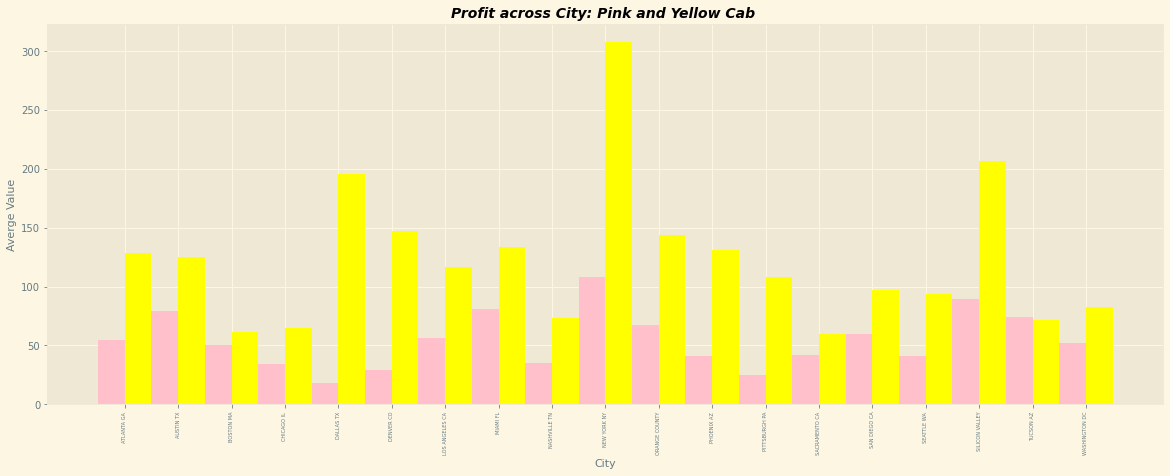

In [51]:
## Distribution
plt.figure(figsize=(20,7))
X= np.arange(19)
plt.bar(X,pvt5.iloc[0,:].values,color="pink",width=0.5,label="Pink Cab")
plt.bar(X+0.5,pvt5.iloc[1,:].values,color="yellow",width=0.5,label="Yellow Cab")
plt.xlabel("City",fontsize=11)
plt.ylabel("Averge Value",fontsize=11)
plt.xticks(X+0.25,city,rotation=90,fontsize=5,fontweight=10)
plt.title("Profit across City: Pink and Yellow Cab ",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("Profit2.png")
plt.show()

#### 7) Hpothesis: There is no differnce in the Prpfit by two cab company across the Year 


In [52]:
pvt6 = pd.pivot_table(New_data, values=["Profit"],index='Company',columns="Year",aggfunc="mean")
pvt6

Profit                        
Year              2016        2017        2018
Company                                       
Pink Cab     68.321819   67.070839   53.229689
Yellow Cab  169.347821  168.817057  143.416122

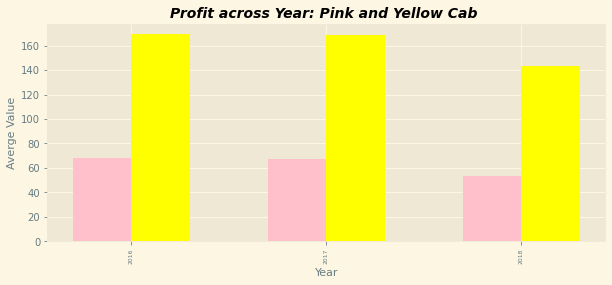

In [53]:
## Distribution
plt.figure(figsize=(10,4))
X= np.arange(3)
plt.bar(X,pvt6.iloc[0,:].values,color="pink",width=0.3,label="Pink Cab")
plt.bar(X+0.3,pvt6.iloc[1,:].values,color="yellow",width=0.3,label="Yellow Cab")
plt.xlabel("Year",fontsize=11)
plt.ylabel("Averge Value",fontsize=11)
plt.xticks(X+0.15,["2016","2017","2018"],rotation=90,fontsize=6)
plt.title("Profit across Year: Pink and Yellow Cab ",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("profit3.png",dpi=100)
plt.show()

#### 8) Hpothesis: There is  a no  differnce in the Profit by two cab company across the Month

In [54]:
# Pivot Table- Avearge Price Charged acroos the year
pvt7 = pd.pivot_table(New_data, values=["Profit"],index='Company',columns="Month",aggfunc="mean")
pvt7

Profit                                                  \
Month               1           2           3           4           5    
Company                                                                  
Pink Cab     76.736129   74.678906   70.825615   60.205265   33.994741   
Yellow Cab  185.374826  199.302085  180.865227  177.254502  212.557685   

                                                                        \
Month               6           7           8           9           10   
Company                                                                  
Pink Cab     39.597623   45.809575   50.168148   51.194380   65.850706   
Yellow Cab  190.079552  135.709081  121.110536  152.287874  140.392116   

                                    
Month               11          12  
Company                             
Pink Cab     73.632546   89.008786  
Yellow Cab  145.427395  146.033211

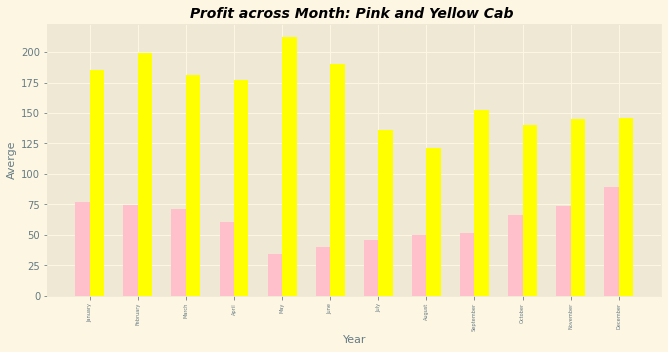

In [55]:
## Distribution
plt.figure(figsize=(11,5))
X= np.arange(12)
plt.bar(X,pvt7.iloc[0,:].values,color="pink",width=0.3,label="Pink Cab")
plt.bar(X+0.3,pvt7.iloc[1,:].values,color="yellow",width=0.3,label="Yellow Cab")
plt.xlabel("Year",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.xticks(X+0.15,["January","February","March","April","May","June","July","August","September","October","November","December"],\
          rotation=90, fontsize=5)
plt.title("Profit across Month: Pink and Yellow Cab ",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("profit4.png", dpi=100)
plt.show()

The Yellow Cab has  a higher average profit across the Month when compared to the Pink Cab. This dynamics has not changed across Month

###### Trend in the Profit

In [56]:
pvt8 = pd.pivot_table(New_data, values=["Profit"],index='Company',columns=["Year","Month"],aggfunc="mean")
pvt8

Profit                                                  \
Year              2016                                                   
Month               1           2           3           4           5    
Company                                                                  
Pink Cab     79.776551   83.310042   71.325088   66.606333   39.279488   
Yellow Cab  224.874458  215.911248  177.762298  176.517989  214.977948   

                                                                        ...  \
Year                                                                    ...   
Month               6           7           8           9           10  ...   
Company                                                                 ...   
Pink Cab     41.100146   49.841288   57.910812   50.416756   72.020053  ...   
Yellow Cab  220.732655  150.389628  122.885222  162.714973  141.616868  ...   

                                                                       \
Year              2018                                                  
Month               3          4           5           6           7    
Company                                                                 
Pink Cab     63.257279   52.53569   26.143758   29.220689   37.333323   
Yellow Cab  163.987571  161.67485  192.701105  171.436095  116.462715   

                                                                        
Year                                                                    
Month               8           9           10          11          12  
Company                                                                 
Pink Cab     42.115484   44.267811   55.893442   61.415892   75.159454  
Yellow Cab  107.815576  133.217173  130.950576  126.173938  133.170695  

[2 rows x 36 columns]

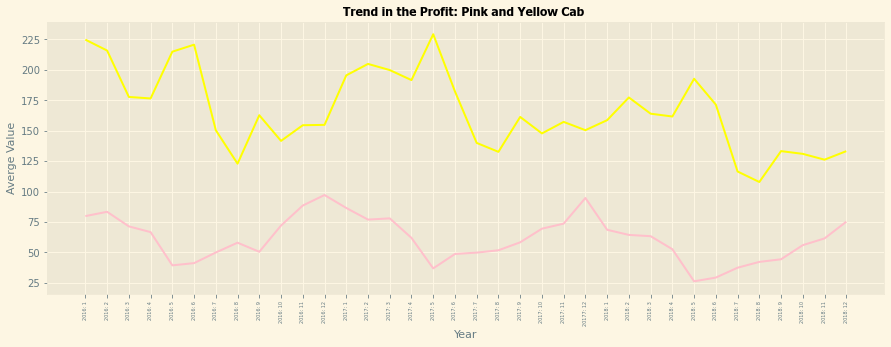

In [57]:
## Distribution
#plt.style.use("classic")
plt.figure(figsize=(15,5))
X= np.arange(36)
pvt8.iloc[0,:].plot(color="pink")
pvt8.iloc[1,:].plot(color="yellow")
plt.xlabel("Year",fontsize=11)
plt.ylabel("Averge Value",fontsize=11)
plt.xticks(X,["2016: 1","2016: 2","2016: 3","2016: 4","2016: 5","2016: 6","2016: 7","2016: 8","2016: 9","2016: 10","2016: 11","2016: 12",\
           "2017: 1","2017: 2","2017: 3","2017: 4","2017: 5","2017: 6","2017: 7","2017: 8","2017: 9","2017: 10","2017: 11","20177: 12",\
             "2018: 1","2018: 2","2018: 3","2018: 4","2018: 5","2018: 6","2018: 7","2018: 8","2018: 9","2018: 10","2018: 11","2018: 12"],rotation=90,fontsize=5)
plt.title("Trend in the Profit: Pink and Yellow Cab ",fontname="Tahoma",fontsize=12,fontstyle="italic",fontweight="bold")
plt.savefig("profit5.png", dp=100)
plt.show()

### c) KM Travelled Analysis

In [58]:
company_group.mean()["KM Travelled"]

Company
Pink Cab      22.559917
Yellow Cab    22.569517
Name: KM Travelled, dtype: float64

#### 9) Hpothesis: There is no difference in the KM travelled by two cab company

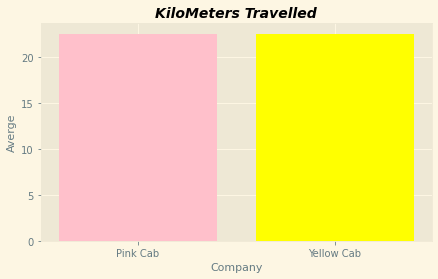

In [59]:
## Bar chart
plt.figure(figsize=(7,4))
plt.bar(company_group.mean().index,company_group.mean()["KM Travelled"],color=["pink","yellow"])
plt.xlabel("Company",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.title("KiloMeters Travelled",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("KM.png", dpi=100)
plt.show()

There is no difference visually in the KM travelled between Yellow and Pink Cab

In [60]:
## The Differnce in the KM Travelled
company_group.mean()["KM Travelled"][1] - company_group.mean()["KM Travelled"][0]

0.009600118280694403

The Yellow cab travelled more Kilometres when compared to the pink cab, Although this might not be signficant.
The yellow Cab travelled more Kilometres 0.009600118280694403 the pink cab.


###### Hypothesis testing using the two sample Test

H0: The average distanced travellled in KM by the yellow cab is not different from the pink cab

H1: The average distanced travellled in KM by the yellow cab is greater then the pink cab


In [61]:
## An array of Priced charged by the pink cab
Pink_KM_Travelled= New_data[New_data["Company"] == "Pink Cab"]["KM Travelled"]
Yellow_KM_Travelled = New_data[New_data["Company"] == "Yellow Cab"]["KM Travelled"]


In [62]:
# Two sample T test with assumption of unequal varainace
ttest3 = stats.ttest_ind(Yellow_KM_Travelled,Pink_KM_Travelled,equal_var= False)
ttest3

Ttest_indResult(statistic=0.19970297254420766, pvalue=0.8417131770119453)

The Pvalue of   0.8417131770119453 is greater than the level of significance. The null hypothesis is not rejected.

The average distanced travellled in KM by the yellow cab is not different from the pink cab

#### 10) Hpothesis: There is no  difference in the KM Travelled by two cab company across the different City

In [63]:
pvt9 = pd.pivot_table(New_data, values=["KM Travelled"],index='Company',columns="City",aggfunc="mean")
pvt9

KM Travelled                                              \
City         ATLANTA GA  AUSTIN TX  BOSTON MA CHICAGO IL  DALLAS TX   
Company                                                               
Pink Cab      22.539824  21.969176  22.740746  22.511070  22.021203   
Yellow Cab    22.248247  22.512840  22.543649  22.659493  22.599395   

                                                                          \
City        DENVER CO LOS ANGELES CA   MIAMI FL NASHVILLE TN NEW YORK NY   
Company                                                                    
Pink Cab    22.459218      22.635629  22.299925    22.528066   22.622415   
Yellow Cab  22.444097      22.688117  22.635606    22.968837   22.496362   

                                                                              \
City       ORANGE COUNTY PHOENIX AZ PITTSBURGH PA SACRAMENTO CA SAN DIEGO CA   
Company                                                                        
Pink Cab       22.213153  21.747384     22.581613     22.604303    22.554710   
Yellow Cab     22.364597  22.529450     22.670523     22.949719    22.391995   

                                                               
City       SEATTLE WA SILICON VALLEY  TUCSON AZ WASHINGTON DC  
Company                                                        
Pink Cab    22.694133      22.791838  22.556909     22.480756  
Yellow Cab  22.583783      22.696391  22.267527     22.625514

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


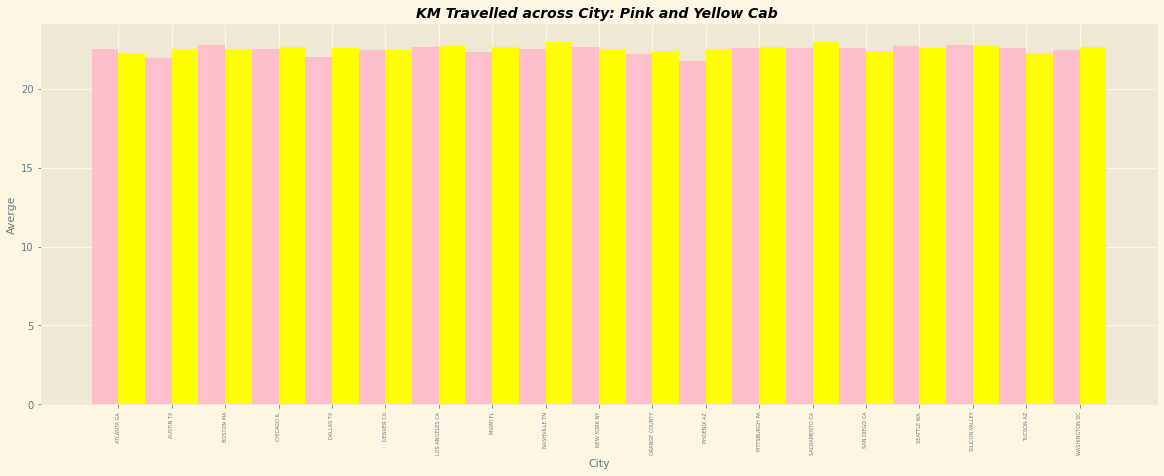

In [64]:
## Distribution
plt.figure(figsize=(20,7))
X= np.arange(19)
plt.bar(X,pvt9.iloc[0,:].values,color="pink",width=0.5,label="Pink Cab")
plt.bar(X+0.5,pvt9.iloc[1,:].values,color="yellow",width=0.5,label="Yellow Cab")
plt.xlabel("City",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.xticks(X+0.25,city,rotation=90, fontsize=5)
plt.title("KM Travelled across City: Pink and Yellow Cab ",fontname="Ubuntu",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("KM2.png",dp=100)
plt.show()

Visually, There is no signifcnace difference  in the KM travelled across city between the Pink and Yellow Cab

#### 11) Hpothesis: There is no differnce in the KM Travelled by two cab company across the Year

In [65]:
pvt10 = pd.pivot_table(New_data, values=["KM Travelled"],index='Company',columns="Year",aggfunc="mean")
pvt10

KM Travelled                      
Year               2016       2017       2018
Company                                      
Pink Cab      22.468488  22.618763  22.577275
Yellow Cab    22.616742  22.557303  22.541036

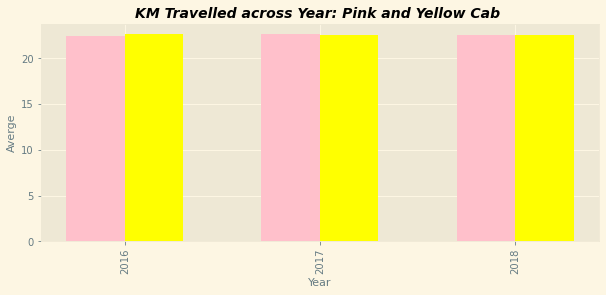

In [66]:
## Distribution
plt.figure(figsize=(10,4))
X= np.arange(3)
plt.bar(X,pvt10.iloc[0,:].values,color="pink",width=0.3,label="Pink Cab")
plt.bar(X+0.3,pvt10.iloc[1,:].values,color="yellow",width=0.3,label="Yellow Cab")
plt.xlabel("Year",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.xticks(X+0.15,["2016","2017","2018"],rotation=90)
plt.title("KM Travelled across Year: Pink and Yellow Cab ",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("KM3.png",dpi=100)
plt.show()

There is no siginicance differnce visually in  KM Travelled between the Yellow and pink cab across the year

#### 12) Hpothesis: There is  a no  differnce in the KM Travelled by two cab company across the Month

In [67]:
# Pivot Table- Avearge Price Charged acroos the year
pvt11 = pd.pivot_table(New_data, values=["KM Travelled"],index='Company',columns="Month",aggfunc="mean")
pvt11

KM Travelled                                              \
Month                1          2          3          4          5    
Company                                                               
Pink Cab      22.491693  22.580987  22.988615  22.503098  22.478395   
Yellow Cab    22.743680  22.514041  22.588583  22.582103  22.493946   

                                                                              \
Month              6          7          8          9          10         11   
Company                                                                        
Pink Cab    22.728935  22.504636  22.508783  22.498595  22.496822  22.526004   
Yellow Cab  22.551023  22.689308  22.557366  22.481982  22.520269  22.584162   

                       
Month              12  
Company                
Pink Cab    22.603079  
Yellow Cab  22.571087

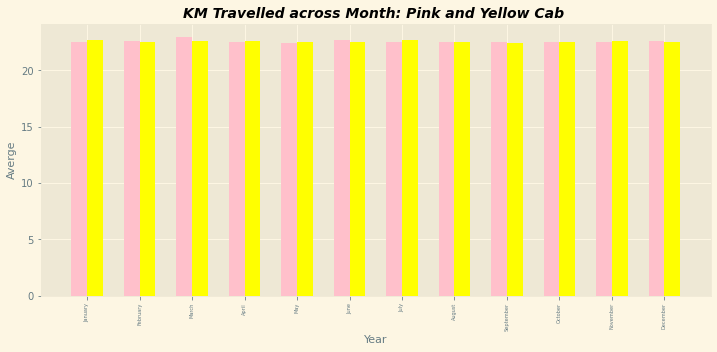

In [68]:
## Distribution
plt.figure(figsize=(12,5))
X= np.arange(12)
plt.bar(X,pvt11.iloc[0,:].values,color="pink",width=0.3,label="Pink Cab")
plt.bar(X+0.3,pvt11.iloc[1,:].values,color="yellow",width=0.3,label="Yellow Cab")
plt.xlabel("Year",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.xticks(X+0.15,["January","February","March","April","May","June","July","August","September","October","November","December"],\
          rotation=90,fontsize=5)
plt.title("KM Travelled across Month: Pink and Yellow Cab ",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("KM4.png",dpi=100)
plt.show()

There is no siginicance differnce visually in KM travelled between the Yellow and pink cab across the Month

###### Trend in the KM Travelled

In [69]:
pvt12 = pd.pivot_table(New_data, values=["KM Travelled"],index='Company',columns=["Year","Month"],aggfunc="mean")
pvt12

KM Travelled                                              \
Year               2016                                               
Month                1          2          3          4          5    
Company                                                               
Pink Cab      22.674035  22.304610  22.659448  22.062403  22.423631   
Yellow Cab    22.749032  22.529382  22.831691  22.725065  22.396236   

                                                                   ...  \
Year                                                               ...   
Month              6          7          8          9          10  ...   
Company                                                            ...   
Pink Cab    22.687538  22.809346  22.560370  22.227971  22.206341  ...   
Yellow Cab  22.546813  22.737934  22.643325  22.546946  22.475180  ...   

                                                                              \
Year             2018                                                          
Month              3          4          5          6          7          8    
Company                                                                        
Pink Cab    23.048019  22.872824  22.679485  22.475019  22.490560  22.232703   
Yellow Cab  22.468278  22.714124  22.658469  22.575006  22.696719  22.522802   

                                                        
Year                                                    
Month              9          10         11         12  
Company                                                 
Pink Cab    22.583771  22.661936  22.670867  22.428245  
Yellow Cab  22.282961  22.534065  22.526416  22.530559  

[2 rows x 36 columns]

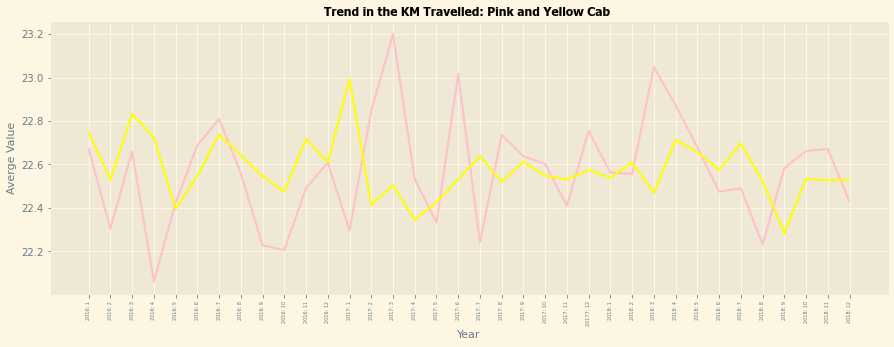

In [70]:
## Distribution
#plt.style.use("classic")
plt.figure(figsize=(15,5))
X= np.arange(36)
pvt12.iloc[0,:].plot(color="pink")
pvt12.iloc[1,:].plot(color="yellow")
plt.xlabel("Year",fontsize=11)
plt.ylabel("Averge Value",fontsize=11)
plt.xticks(X,["2016: 1","2016: 2","2016: 3","2016: 4","2016: 5","2016: 6","2016: 7","2016: 8","2016: 9","2016: 10","2016: 11","2016: 12",\
           "2017: 1","2017: 2","2017: 3","2017: 4","2017: 5","2017: 6","2017: 7","2017: 8","2017: 9","2017: 10","2017: 11","20177: 12",\
             "2018: 1","2018: 2","2018: 3","2018: 4","2018: 5","2018: 6","2018: 7","2018: 8","2018: 9","2018: 10","2018: 11","2018: 12"],rotation=90,fontsize=5)
plt.title("Trend in the KM Travelled: Pink and Yellow Cab ",fontname="Tahoma",fontsize=12,fontstyle="italic",fontweight="bold")
plt.savefig("KM5.png",dp=100)
plt.show()

### d)  Income Analysis

#### 13) Hpothesis: There is no difference in the Income level of the Customers of the two  cab company

In [71]:
# The Number of Unique customer
print("Number Unique Customer:",New_data["Customer ID"].unique().shape[0])

### Total complete transaction
print("Total Tranaction: ",New_data.shape[0])

### Percentage of Unique customer for all the transaction

print("Percentage of unique customer:",New_data["Customer ID"].unique().shape[0]/New_data.shape[0])

Number Unique Customer: 46148
Total Tranaction:  359392
Percentage of unique customer: 0.12840575193660403


In [72]:
# Dropping the duplicate 
Unique= New_data.drop_duplicates(subset=["Customer ID"])
Unique.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,...,Age,Income (USD/Month),Population,Users,Price/KM,Cost/KM,Profit/KM,Year,Month,Days
0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290.0,Card,...,28.0,10813.0,814885.0,24701.0,12.182266,10.3,1.882266,2016,1,8
3,10000012.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703.0,Card,...,27.0,9237.0,814885.0,24701.0,12.526904,11.7,0.826904,2016,1,6
7,10000013.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712.0,Cash,...,53.0,11242.0,814885.0,24701.0,13.849558,10.8,3.049558,2016,1,2
11,10000014.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,28020.0,Cash,...,23.0,23327.0,814885.0,24701.0,11.377751,10.6,0.777751,2016,1,7
15,10000015.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,27182.0,Card,...,33.0,8536.0,814885.0,24701.0,13.129439,11.2,1.929439,2016,1,3


In [73]:
### Group by the "Company" variable
unique_group = Unique.groupby("Company")

Index(['Pink Cab', 'Yellow Cab'], dtype='object', name='Company') Company
Pink Cab      15094.171960
Yellow Cab    14952.263514
Name: Income (USD/Month), dtype: float64


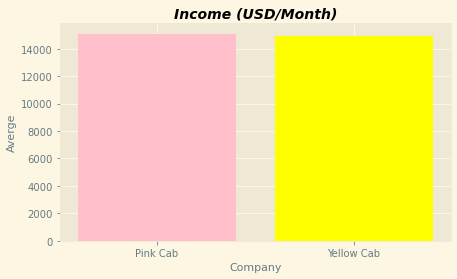

In [74]:
## Bar chart
print(unique_group.mean().index,unique_group.mean()["Income (USD/Month)"])
plt.figure(figsize=(7,4))
plt.bar(unique_group.mean().index,unique_group.mean()["Income (USD/Month)"],color=["pink","yellow"])
plt.xlabel("Company",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.title("Income (USD/Month)",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("Income.png",dpi=100)
plt.show()

In [75]:
## The Differnce in the average price charged
unique_group.mean()["Income (USD/Month)"][1] - unique_group.mean()["Income (USD/Month)"][0]

-141.9084461872335

The Customer of the Yellow cab earned a lower income per month  when compared to the pink cab, Although this might not be signficant.

The Customer of the Yellow cab earned -141.9084461872335 lower income per month  when compared to the pink cab.

###### Hypothesis testing using the two sample Test

H0: The Yellow cab customer earn the same income per month compared to the pink cab

H1: The Yellow cab customer earn lesser income per month compared to the pink cab

In [76]:
## An array of Priced charged by the pink cab
Pink_Income= Unique[Unique["Company"] == "Pink Cab"]["Income (USD/Month)"]
Yellow_Income= Unique[Unique["Company"] == "Yellow Cab"]["Income (USD/Month)"]

In [77]:
### Two sample T test with assumption of unequal varainace
ttest4 = stats.ttest_ind(Yellow_Income,Pink_Income,equal_var= False)
ttest4

Ttest_indResult(statistic=-1.7795034424782918, pvalue=0.07516769668877143)

The Pvalue of   0.07516769668877143 is greater than the level of significance. The null hypothesis is not rejected. 

The Yellow cab customer earn the same income per month compared to the pink cab

### Assocaition/Correlation

In [78]:
corr = New_data[['KM Travelled','Price Charged','Cost of Trip','Profit','Age','Income (USD/Month)']].corr()
corr

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month)
KM Travelled,1.000000,0.835753,0.981848,0.462768,-0.000369,-0.000544
Price Charged,0.835753,1.000000,0.859812,0.864154,-0.003084,0.003228
Cost of Trip,0.981848,0.859812,1.000000,0.486056,-0.000189,-0.000633
Profit,0.462768,0.864154,0.486056,1.000000,-0.005093,0.006148
Age,-0.000369,-0.003084,-0.000189,-0.005093,1.000000,0.003907
Income (USD/Month),-0.000544,0.003228,-0.000633,0.006148,0.003907,1.000000


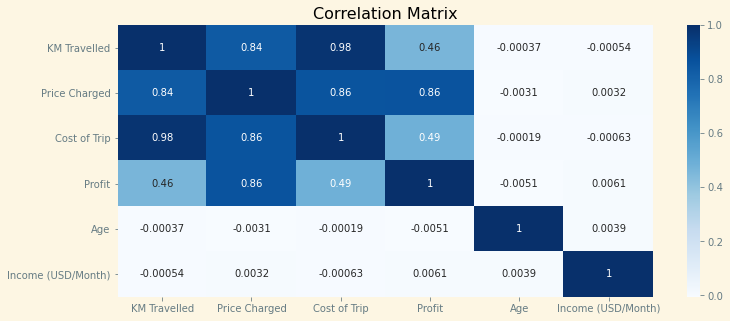

In [79]:
plt.figure(figsize=(12,5))
sns.heatmap(corr,cmap="Blues", annot=True)
plt.title("Correlation Matrix")
plt.savefig("Corr_Heatmap.png",dp=100 )
plt.show()

As observed KM travelled, Price Charged , Cost of Trip , Profit are shows a strong Association with Each other. The Income and Age are not strongly associated with the other variables in the datasets.

In [80]:
New_data["Company"].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

### Hypothesis 14: There is no association between Price Charged and Cost of Trip


H0: The correlation between price charged and Cost of Trip is not significant.

H1: The correlation between price charged and Cost of Trip is statistically significant.

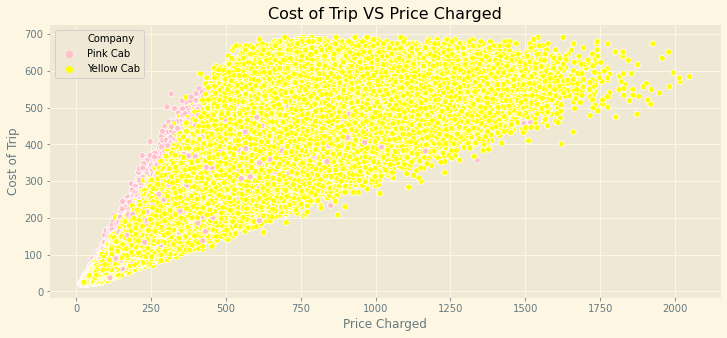

In [81]:
plt.figure(figsize=(12,5))
sns.scatterplot(x= "Price Charged", y = "Cost of Trip", hue='Company',data= New_data, palette=["Pink","Yellow"])
plt.title("Cost of Trip VS Price Charged")
plt.savefig("Price_cost.png",dpi=100)
plt.show()

In [82]:
### Correlation test
print("Correlation ,  P Value : ", stats.pearsonr(New_data["Price Charged"],New_data["Cost of Trip"]))


Correlation ,  P Value :  (0.8598117262915436, 0.0)


The pvalue 0.0  is less the alpha 0.05,we reject the Null hpothesis. The correlation between price charged and Cost of Trip is statistically significant.

### Hypothesis 15: There is no association between Price Charged and KM Travelled 

H0: The correlation between price charged and KM Travelled is not significant.

H1: The correlation between price charged and KM Travelled is statistically significant.

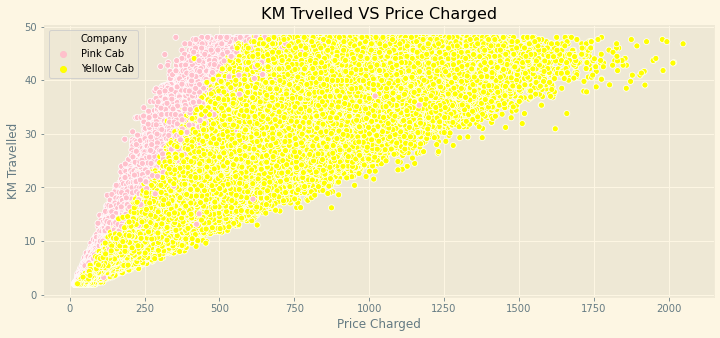

In [83]:
plt.figure(figsize=(12,5))
sns.scatterplot(x= "Price Charged", y = "KM Travelled", hue='Company',data= New_data, palette=["Pink","Yellow"])
plt.title("KM Trvelled VS Price Charged")
plt.savefig("Price_KM.png",dpi=100)
plt.show()

In [84]:
### Correlation test
print("Correlation ,  P Value : ", stats.pearsonr(New_data["Price Charged"],New_data["KM Travelled"]))

Correlation ,  P Value :  (0.8357531580209058, 0.0)


The pvalue 0.0  is less the alpha 0.05,we reject the Null hpothesis. The correlation between price charged and KM Travelled  is statistically significant.

### Hypothesis 16: There is no association between Price Charged and Profit

H0: The correlation between price charged and Profit is not significant.

H1: The correlation between price charged and Profit is statistically significant.

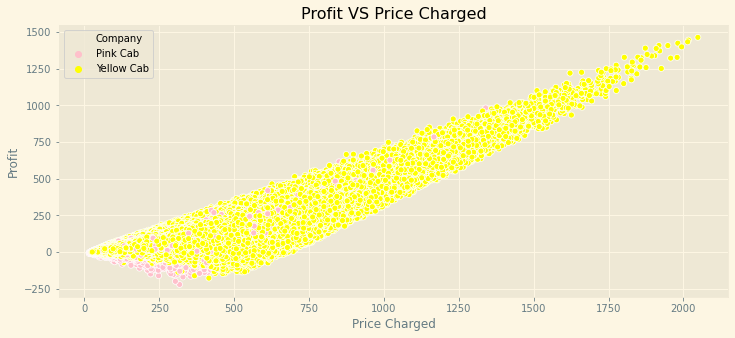

In [85]:
plt.figure(figsize=(12,5))
sns.scatterplot(x= "Price Charged", y = "Profit", hue='Company',data= New_data, palette=["Pink","Yellow"])
plt.title("Profit VS Price Charged")
plt.savefig("Profit_price.png",dpi=100)
plt.show()

In [86]:
### Correlation test
print("Correlation ,  P Value : ", stats.pearsonr(New_data["Price Charged"],New_data["Profit"]))

Correlation ,  P Value :  (0.8641539467506472, 0.0)


The pvalue 0.0  is less the alpha 0.05,we reject the Null hpothesis. The correlation between price charged and Profit  is statistically significant.

### Hypothesis 17: There is no association between Price Charged and Age

H0: The correlation between price charged and Age is not significant.

H1: The correlation between price charged and Age is statistically significant.

<ipython-input-87-b5fa8128529c>:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Age_price.png",dpi=100)
C:\Users\hp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


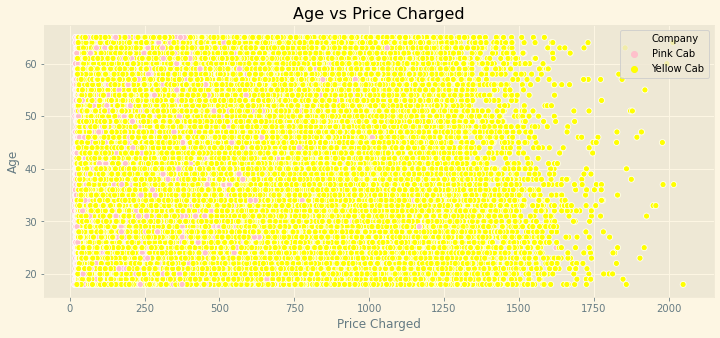

In [87]:
plt.figure(figsize=(12,5))
sns.scatterplot(x= "Price Charged", y = "Age", hue='Company',data= New_data, palette=["Pink","Yellow"])
plt.title("Age vs Price Charged")
plt.savefig("Age_price.png",dpi=100)
plt.show()

In [88]:
### Correlation test
print("Correlation ,  P Value : ", stats.pearsonr(New_data["Price Charged"],New_data["Age"]))

Correlation ,  P Value :  (-0.003084247803618612, 0.06446022387756313)


The pvalue 0.06446022387756313  is greater than the alpha 0.05,we reject the Null hpothesis. The correlation between price charged and age   is not statistically significant.

### Hypothesis 18: There is no association between Profit and KM Travelled

H0: The correlation between Profit and KM Travelled is not significant.

H1: The correlation between Profit and KM Travelled  is statistically significant.

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x= "Profit", y = "KM Travelled", hue='Company',data= New_data, palette=["Pink","Yellow"])
plt.title("KM Travelled VS Profit")
plt.savefig("KM_profit.png",dpi=100)
plt.show()

In [ ]:
### Correlation test
print("Correlation ,  P Value : ", stats.pearsonr(New_data["Profit"],New_data["KM Travelled"]))

The pvalue 0.0  is less the alpha 0.05,we reject the Null hpothesis. The correlation between price charged and Profit  is statistically significant.

#### Recommendation

I evaluated the performance of the the two cab company in their performance for KM Travelled, Price Charged and Profit Made. Overall Performance was Evaluated and the performance Across the City and Over the Year and Month was evaluated.

- After Evaluting the  Average KM Travelled, there is no clear difference in the KM Travelled by both the Pink and Yellow Cab
- The Yellow cab charged a more price per trip even in the same city where the same KM was Travveled by the Pink and Yellow Cab.

- KM Travelled the same but the Yellow cab charged more price per trip compared to the pink cab

- As a result, the Yellow cabs makes more profit than the Pink Cab

- We also observed some positive and significant association between then Price Charged, Cost of Trip, Profit and KM Travelled while Income and Age has no signifcant association with the other variables in study. This tells us we can make some predictions with the variables we have in study.

On the basis of above point , we will recommend Yellow cab for investment.
